#Parte 1 - Classificação


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Leitura dos dados
from google.colab import drive
drive.mount('/content/gdrive')
data_set = pd.read_csv('/content/gdrive/MyDrive/FRANK - GT Datasets/winequalityN.csv')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Verificação dos dados de referência para a classificação
import pandas as pd
data_set

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# Verificando os vetores colunas: data_set
data_set.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
# Contagem da quantidade de valores nulos
data_set.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# Calculando a média e a moda dos vetores colunas (features)
print('moda é \n', data_set['fixed acidity'].mode(), '\n', 'média é \n', data_set['fixed acidity'].median(), '\n', 
      'moda é \n', data_set['volatile acidity'].mode(), '\n', 'média é \n', data_set['volatile acidity'].median(), '\n',
      'moda é \n', data_set['citric acid'].mode(), '\n', 'média é \n', data_set['citric acid'].median(), '\n',
      'moda é \n', data_set['residual sugar'].mode(), '\n', 'média é \n', data_set['residual sugar'].median(), '\n',
      'moda é \n', data_set['chlorides'].mode(), '\n', 'média é \n', data_set['chlorides'].median(), '\n',
      'moda é \n', data_set['pH'].mode(), '\n', 'média é \n', data_set['pH'].median(), '\n',
      'moda é \n', data_set['sulphates'].mode(), '\n', 'média é \n', data_set['sulphates'].median(), '\n',
      )

moda é 
 0    6.8
dtype: float64 
 média é 
 7.0 
 moda é 
 0    0.28
dtype: float64 
 média é 
 0.29 
 moda é 
 0    0.3
dtype: float64 
 média é 
 0.31 
 moda é 
 0    2.0
dtype: float64 
 média é 
 3.0 
 moda é 
 0    0.044
dtype: float64 
 média é 
 0.047 
 moda é 
 0    3.16
dtype: float64 
 média é 
 3.21 
 moda é 
 0    0.5
dtype: float64 
 média é 
 0.51 



In [ ]:
#Renomeando os vetores colunas que estão espaçados colocando o sinal de "_" entre os espaços.
data_set = data_set.rename(columns = {'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar': 'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide' })

In [ ]:
#Substituição dos valores nulos pela moda dos seus respectivos vetores colunas.
values = {'fixed_acidity':data_set.fixed_acidity.mode()[0], 'volatile_acidity':data_set.volatile_acidity.mode()[0], 'citric_acid':data_set.citric_acid.mode()[0],
       'residual_sugar':data_set.residual_sugar.mode()[0], 'chlorides':data_set.chlorides.mode()[0], 'pH':data_set.pH.mode()[0], 'sulphates':data_set.sulphates.mode()[0]}

data_set.fillna(value = values,inplace=True)

In [ ]:
#Contagem de valores nulos após a substituição
data_set.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Atribuindo para as string "white" e "red" os valores de 0 e 1, respectivamente.
data_set['type'] = data_set['type'].apply(lambda x: 0 if x=='white' else 1)

In [ ]:
#Dividindo em binário a classificação da qualidade do vinho, 0 para ruim(qualidade abaixo de 7) e 1 para bom(qualidade igual ou acima de 7)
data_set['quality_bi'] = data_set['quality'].apply(lambda x: 0 if x<7 else 1) # 0 ruim e 7 ou acima bom

In [ ]:
data_set

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_bi
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.50,11.2,6,0
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [ ]:
#Verificando os binários substituídos nas string "white" e "red"
data_set['quality_bi'].unique()

array([0, 1])

In [ ]:
#Escalonamento 
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Colocando os valores não binários na mesma escala
#Calculado a partir da diferença entre o valor original e a média dividida pela amplitude do dado, ou seja, valor maior menos o valor menor.
minmax = MinMaxScaler()
data_set[['fixed_acidity', 'volatile_acidity',	'citric_acid',	
          'residual_sugar',	'chlorides',	'free_sulfur_dioxide',
          	'total_sulfur_dioxide',	'density',	'pH',	'sulphates', 'alcohol']] = minmax.fit_transform(data_set[['fixed_acidity', 'volatile_acidity',	'citric_acid',	
                                                                                            'residual_sugar',	'chlorides',	'free_sulfur_dioxide',
          	                                                                                'total_sulfur_dioxide',	'density',	'pH',	'sulphates', 'alcohol']])
           

In [ ]:
#Verificação dos dados normalizados por meio do MinMaxScaler
data_set

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_bi
0,0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,6,0
1,0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,6,0
2,0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,6,0
3,0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,6,0
4,0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.087558,0.150183,0.565891,0.202247,0.362319,5,0
6493,1,0.173554,0.313333,0.060241,0.024540,0.088040,0.131944,0.103687,0.154425,0.620155,0.157303,0.463768,6,0
6494,1,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.078341,0.166377,0.542636,0.297753,0.434783,6,0
6495,1,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.087558,0.161172,0.658915,0.275281,0.318841,5,0


In [ ]:
# Determinando o target e as features para a classificação.
y = ['quality_bi']
x = ['type',	'fixed_acidity',	'volatile_acidity',	'citric_acid',	'residual_sugar',	'chlorides',	'free_sulfur_dioxide',	'total_sulfur_dioxide',	'density',	'pH',	'sulphates',	'alcohol']

In [ ]:
#Criando vetores para a separação dos dados entre treino e teste e para o treinamento do modelo de classificação
parameter_y = data_set[y]
parameter_x = data_set[x]

In [ ]:
#separando os dados de treinamento e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(parameter_x, parameter_y, test_size=0.3)

In [ ]:
#Modelo de classificação
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(random_state=1)

In [ ]:
#Classificação
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



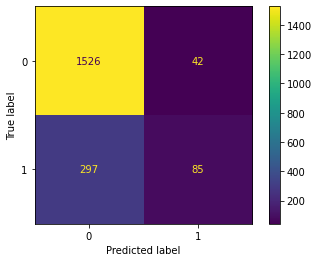

In [ ]:
plot_confusion_matrix(classifier, x_test, y_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(parameter_y[0:1950], y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1519
           1       0.17      0.05      0.08       431

    accuracy                           0.74      1950
   macro avg       0.47      0.49      0.46      1950
weighted avg       0.64      0.74      0.68      1950



#Parte 2 - SVR

# Carregamento dos dados e cálculo do Vp e Vs para ambos os campos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/jadsomjose/data_well.git

Cloning into 'data_well'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 76 (delta 24), reused 54 (delta 14), pack-reused 0
Unpacking objects: 100% (76/76), done.


In [ ]:
pip install lasio[all]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 263 kB 9.0 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lasio
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import BayesianRidge
#from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [ ]:
# carregando dados

norne1 = lasio.read('data_well/dado_norne/660810-B-4AH.las').df() # complete 
norne2 = lasio.read('data_well/dado_norne/660810-C-1H.las').df() # complete
#norne3 = lasio.read('data_well/dado_norne/660810-C-2H.las').df() # não apresenta RHOB
norne4 = lasio.read('data_well/dado_norne/660810-C-3H.las').df() # complete
norne5 = lasio.read('data_well/dado_norne/660810-C-4AH.las').df() # complete 
norne6 = lasio.read('data_well/dado_norne/660810-D-4H.las').df() # complete
norne7 = lasio.read('data_well/dado_norne/660810-E-3H.las').df() # complete 
cambo_1 = lasio.read('data_well/dado_cambo/204_05a-1_DATACO_JWDL_QC.las').df()
#cambo_2 = lasio.read('data_well/dado_cambo/204_10-1_DATACO_JWDL_QC.las').df() não apresenta DTS
cambo_3 = lasio.read('data_well/dado_cambo/204_10a-3_DATACO_JWDL_QC.las').df()
cambo_4 = lasio.read('data_well/dado_cambo/204_10a-4_DATACO_JWDL_QC.las').df()


In [ ]:
# Tirando os valores nulos (sem registro)
norne1 = norne1.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB', 'GR'])
norne2 = norne2.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB', 'GR'])
#norne3 = norne3.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB']) # Não apresenta RHOB
norne4 = norne4.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB', 'GR'])
norne5 = norne5.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB', 'GR'])
norne6 = norne6.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB', 'GR'])
norne7 = norne7.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB', 'GR'])

cambo_1 = cambo_1.dropna(subset=['DTC', 'NEUT', 'DTS','DENS', 'GR_WL'])
#cambo_2 = cambo_2.dropna(subset=['DT', 'NEUT', 'DTS','DENS', 'GR']) # não apresenta DTS
cambo_3 = cambo_3.dropna(subset=['DTC', 'NEUT', 'DTS','DENS', 'GR'])
cambo_4 = cambo_4.dropna(subset=['DTC', 'NEUT', 'DTS','DENS', 'GR'])



In [ ]:
cambo_1.reset_index()

,DEPTH,CALI_LWD,CALI_WL,DENC,DENS,DTC,DTS,GR_LWD,GR_WL,NEUT,...,RDEP,RLA1,RLA2,RLA3,RLA4,RLA5,RPCHM,RPCLM,RT_HRLT,RXO_HRLT
0,7575.0,12.3345,18.5563,-0.0035,1.4405,101.9942,243.8885,57.7570,146.6177,0.7616,...,1.2538,1.3809,2.2560,3.1539,3.1760,2.7421,1.2355,1.2611,3.7069,1.2883
1,7575.5,12.3385,18.5615,-0.0099,1.4276,105.0495,186.6996,54.6236,155.0675,0.7523,...,1.2675,1.2667,1.9609,2.6655,2.8028,2.4259,1.2573,1.2696,3.3276,1.0100
2,7576.0,12.3218,18.5614,-0.0129,1.4171,105.4965,180.4277,58.5673,167.1443,0.6967,...,1.2862,1.1447,1.7311,2.3057,2.4679,2.1326,1.2421,1.2850,2.9276,0.8443
3,7576.5,12.3483,18.5540,-0.0154,1.4055,107.3368,193.4068,63.8640,176.4647,0.6864,...,1.2886,1.0218,1.5734,2.0834,2.2507,1.9493,1.2747,1.2913,2.6892,0.7148
4,7577.0,12.5023,18.5636,-0.0182,1.3943,114.3873,212.1082,68.6352,183.1882,0.7194,...,1.3122,0.9371,1.4561,1.9211,2.0838,1.8250,1.2331,1.3122,2.5248,0.6169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,9032.0,12.0143,12.2464,0.0548,2.4929,106.0688,212.8256,60.3250,101.5125,0.3960,...,1.6220,1.9986,2.4163,2.5728,2.6290,2.5598,1.7315,1.6427,3.0359,1.2068
2883,9032.5,12.0183,12.2053,0.0563,2.4969,106.8163,213.6967,56.4987,99.2651,0.4124,...,1.6187,1.9420,2.3169,2.4934,2.5307,2.5015,1.7082,1.6234,2.9661,1.2185
2884,9033.0,12.0261,12.2022,0.0550,2.4938,107.4993,215.5808,52.5641,98.4752,0.4321,...,1.5954,2.2848,2.5170,2.6899,2.6888,2.6242,1.6727,1.5982,2.9456,1.6731
2885,9033.5,12.0326,12.2121,0.0501,2.4749,108.2034,219.3385,51.7022,100.5677,0.4434,...,1.5843,2.1123,2.3627,2.5118,2.5091,2.4549,1.6603,1.5801,2.7664,1.6032


In [ ]:
cambo_4.reset_index()

,DEPTH,CALI,DENC,DENS,DTC,DTS,GR,NEUT,PEF,RACHM,RACLM,RDEP,RLA2,RLA4,RMED,RMIC,RPCHM,RPCLM,RSHAL,SP
0,7566.0,16.8794,0.0519,2.2316,123.0128,278.9178,82.4459,0.7393,5.9887,1.0515,1.0653,1.1721,1.1050,1.2201,1.2354,NaN,1.0910,1.0714,0.7733,57.9480
1,7566.5,17.0103,0.0249,2.1701,125.1202,278.2628,83.1519,0.5943,5.8339,1.0612,1.0665,1.2057,1.2180,1.3133,1.3729,NaN,1.0906,1.0775,0.8510,58.1355
2,7567.0,16.8163,0.0090,2.1776,125.5746,280.2031,83.3492,0.6439,6.0780,1.0612,1.0705,1.2224,1.2400,1.3441,1.4150,NaN,1.0455,1.0628,0.8655,58.1980
3,7567.5,16.9566,0.0068,2.1517,126.8035,283.5175,84.9550,0.6689,5.6565,1.0466,1.0749,1.2725,1.2875,1.4151,1.4889,NaN,1.0168,1.0495,0.8911,58.1355
4,7568.0,17.0015,0.0009,2.1785,127.0351,292.2746,84.3690,0.7125,5.1703,1.0436,1.0795,1.3113,1.3148,1.4715,1.5283,NaN,1.0354,1.0505,0.9237,58.1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,8903.0,12.7913,0.0009,2.4648,104.6526,217.6511,101.5306,0.3170,3.2192,2.0985,2.2552,3.2021,3.6527,3.5751,3.7399,3.5408,2.2132,2.1616,3.1880,72.7605
2675,8903.5,12.8014,0.0052,2.4717,104.3472,216.7653,106.8925,0.3243,3.1905,2.1142,2.2705,3.2452,3.7054,3.6208,3.7928,3.6317,2.1488,2.1379,3.2609,69.4480
2676,8904.0,12.7980,0.0128,2.4620,104.0706,217.5949,105.9781,0.3156,3.2474,2.1086,2.2729,3.1995,3.6832,3.5730,3.7474,3.9595,2.1258,2.1257,3.2904,67.8855
2677,8904.5,12.7886,0.0129,2.4491,104.0851,216.5096,106.5735,0.3127,3.3077,2.0996,2.2787,3.1586,3.5968,3.4922,3.6925,3.5554,2.1367,2.1287,3.1620,68.5730


In [ ]:
cambo_3.reset_index()

,DEPTH,A16H,A22H,A28H,A34H,A40H,CALI,DENC,DENS,DTC,...,P34H,P40H,PEF,RDEP,RLA2,RLA4,RMED,RMIC,RSHAL,SP
0,7550.0,NaN,NaN,NaN,NaN,NaN,8.8154,0.0110,2.2846,124.3510,...,NaN,NaN,4.2160,1.4911,1.9325,1.6199,1.7312,NaN,1.9021,112.1350
1,7550.5,NaN,NaN,NaN,NaN,NaN,8.8541,-0.0010,2.2904,122.9690,...,NaN,NaN,4.4159,1.4096,1.7586,1.5535,1.7156,NaN,1.7201,109.5100
2,7551.0,NaN,NaN,NaN,NaN,NaN,8.8667,-0.0025,2.2540,122.3419,...,NaN,NaN,4.3743,1.3509,1.6768,1.5237,1.6775,NaN,1.6457,106.8225
3,7551.5,NaN,NaN,NaN,NaN,NaN,8.8133,-0.0016,2.2868,121.3799,...,NaN,NaN,4.3493,1.6535,1.9970,1.8589,2.0335,NaN,1.9497,99.8850
4,7552.0,1.3275,1.3206,1.3169,1.3171,1.3183,8.7238,-0.0005,2.2567,120.5432,...,1.2605,1.2601,4.4092,1.7338,2.0246,1.9475,2.0828,NaN,1.9868,96.9475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,9148.0,2.7535,2.6995,2.6778,2.6822,2.6892,8.5406,-0.0014,2.4955,104.2277,...,2.5457,2.5389,3.1095,3.3376,3.4173,3.3414,3.3993,3.8152,3.4585,116.9475
3197,9148.5,2.7321,2.6890,2.6635,2.6574,2.6588,8.5222,-0.0048,2.4784,104.3981,...,2.5423,2.5351,3.3219,3.3689,3.4533,3.3658,3.4314,3.7706,3.4821,122.8850
3198,9149.0,2.7198,2.6842,2.6703,2.6792,2.6940,8.5325,-0.0076,2.4648,104.3717,...,2.4711,2.4568,3.2511,3.3433,3.4263,3.3382,3.4002,3.6602,3.4403,118.5725
3199,9149.5,2.7199,2.6805,2.6627,2.6685,2.6818,8.5369,-0.0100,2.4454,103.6262,...,2.4326,2.4197,3.2924,3.3768,3.4527,3.3698,3.4325,3.5597,3.4465,115.8850


In [ ]:
# Base de dados para o calculo do Vs e Vp para norne1
VSH1 = norne1.loc[:, ['VSH']]
NPHI1 = norne1.loc[:, ['NPHI']]
RHOB1 = norne1.loc[:, ['RHOB']]
DTS1 = norne1.loc[:, ['DTS']]
DT1 = norne1.loc[:, ['DT']]

Calculando VP e VS

$V_P=10^3 \frac{0.3048}{\Delta t_P}$ --> km/s


In [ ]:
# Calculo do VS E VP para norne 1
norne1['VP'] = (0.3048/norne1['DT'])*10**3 #VP
norne1['VS'] = (0.3048/norne1['DTS'])*10**3 #VP
vp1=norne1['VP']
vs1=norne1['VS']

In [ ]:
norne1.columns

Index(['TVD', 'TVDSS', 'DT', 'DTS', 'GR', 'KLOGH', 'NPHI', 'PHIF', 'RHOB',
       'SW', 'VSH', 'VP', 'VS'],
      dtype='object')

In [ ]:
# Calculo do VS E VP para norne 2
norne2['VP'] = (0.3048/norne2['DT'])*10**3 #VP
norne2['VS'] = (0.3048/norne2['DTS'])*10**3 #VP
vp2=norne1['VP']
vs2=norne1['VS']

In [ ]:
norne2.columns

Index(['TVD', 'TVDSS', 'DT', 'DTS', 'GR', 'KLOGH', 'NPHI', 'PHIF', 'RHOB',
       'SW', 'VSH', 'VP', 'VS'],
      dtype='object')

In [ ]:
# Calculo do VS E VP para norne 4
norne4['VP'] = (0.3048/norne4['DT'])*10**3 #VP
norne4['VS'] = (0.3048/norne4['DTS'])*10**3 #VP
vp4=norne4['VP']
vs4=norne4['VS']

In [ ]:
norne4.columns

Index(['TVD', 'TVDSS', 'DT', 'DTS', 'GR', 'KLOGH', 'NPHI', 'PHIF', 'RHOB',
       'SW', 'VSH', 'VP', 'VS'],
      dtype='object')

In [ ]:
# Calculo do VS E VP para norne 5
norne5['VP'] = (0.3048/norne5['DT'])*10**3 #VP
norne5['VS'] = (0.3048/norne5['DTS'])*10**3 #VP
vp5=norne5['VP']
vs5=norne5['VS']

In [ ]:
norne5.columns

Index(['TVD', 'TVDSS', 'DT', 'DTS', 'GR', 'KLOGH', 'NPHI', 'PHIF', 'RHOB',
       'SW', 'VSH', 'VP', 'VS'],
      dtype='object')

In [ ]:
# Calculo do VS E VP para norne 6
norne6['VP'] = (0.3048/norne6['DT'])*10**3 #VP
norne6['VS'] = (0.3048/norne6['DTS'])*10**3 #VP
vp6=norne6['VP']
vs6=norne6['VS']

In [ ]:
norne6.columns

Index(['TVD', 'TVDSS', 'DT', 'DTS', 'GR', 'KLOGH', 'NPHI', 'PHIF', 'RHOB',
       'SW', 'VSH', 'VP', 'VS'],
      dtype='object')

In [ ]:
# Calculo do VS E VP para norne 7
norne7['VP'] = (0.3048/norne7['DT'])*10**3 #VP
norne7['VS'] = (0.3048/norne7['DTS'])*10**3 #VP
vp7=norne7['VP']
vs7=norne7['VS']

In [ ]:
norne7.columns

Index(['TVD', 'TVDSS', 'DT', 'DTS', 'GR', 'KLOGH', 'NPHI', 'PHIF', 'RHOB',
       'SW', 'VSH', 'VP', 'VS'],
      dtype='object')

In [ ]:
depth = norne1.index

In [ ]:
# Calculo do VS E VP para norne 7
cambo_1['VP'] = (0.3048/cambo_1['DTC'])*10**3 #VP
cambo_1['VS'] = (0.3048/cambo_1['DTS'])*10**3 #VP

In [ ]:
cambo_1['VS'] = (0.3048/cambo_1['DTS'])*10**3 #VP

In [ ]:
# Calculo do VS E VP para norne 7
cambo_3['VP'] = (0.3048/cambo_3['DTC'])*10**3 #VP
cambo_3['VS'] = (0.3048/cambo_3['DTS'])*10**3 #VP

In [ ]:
# Calculo do VS E VP para norne 7
cambo_4['VP'] = (0.3048/cambo_4['DTC'])*10**3 #VP
cambo_4['VS'] = (0.3048/cambo_4['DTS'])*10**3 #VP

In [ ]:
# Renomeado as variáveis do campo cambo para os modelos
cambo_1 = cambo_1.rename(columns={'DENS':'RHOB','NEUT':'NPHI','GR_WL':'GR',})
cambo_3 = cambo_1.rename(columns={'DENS':'RHOB','NEUT':'NPHI',})
cambo_4 = cambo_1.rename(columns={'DENS':'RHOB','NEUT':'NPHI',})

In [ ]:
cambo_1

,CALI_LWD,CALI_WL,DENC,RHOB,DTC,DTS,GR_LWD,GR,NPHI,PEF,...,RLA2,RLA3,RLA4,RLA5,RPCHM,RPCLM,RT_HRLT,RXO_HRLT,VP,VS
DEPTH,,,,,,,,,,,,,,,,,,,,,
7575.0,12.3345,18.5563,-0.0035,1.4405,101.9942,243.8885,57.7570,146.6177,0.7616,NaN,...,2.2560,3.1539,3.1760,2.7421,1.2355,1.2611,3.7069,1.2883,2.988405,1.249751
7575.5,12.3385,18.5615,-0.0099,1.4276,105.0495,186.6996,54.6236,155.0675,0.7523,6.9440,...,1.9609,2.6655,2.8028,2.4259,1.2573,1.2696,3.3276,1.0100,2.901489,1.632569
7576.0,12.3218,18.5614,-0.0129,1.4171,105.4965,180.4277,58.5673,167.1443,0.6967,6.9758,...,1.7311,2.3057,2.4679,2.1326,1.2421,1.2850,2.9276,0.8443,2.889195,1.689319
7576.5,12.3483,18.5540,-0.0154,1.4055,107.3368,193.4068,63.8640,176.4647,0.6864,7.0247,...,1.5734,2.0834,2.2507,1.9493,1.2747,1.2913,2.6892,0.7148,2.839660,1.575953
7577.0,12.5023,18.5636,-0.0182,1.3943,114.3873,212.1082,68.6352,183.1882,0.7194,7.0781,...,1.4561,1.9211,2.0838,1.8250,1.2331,1.3122,2.5248,0.6169,2.664631,1.437002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9032.0,12.0143,12.2464,0.0548,2.4929,106.0688,212.8256,60.3250,101.5125,0.3960,5.1194,...,2.4163,2.5728,2.6290,2.5598,1.7315,1.6427,3.0359,1.2068,2.873607,1.432159
9032.5,12.0183,12.2053,0.0563,2.4969,106.8163,213.6967,56.4987,99.2651,0.4124,5.0793,...,2.3169,2.4934,2.5307,2.5015,1.7082,1.6234,2.9661,1.2185,2.853497,1.426321
9033.0,12.0261,12.2022,0.0550,2.4938,107.4993,215.5808,52.5641,98.4752,0.4321,5.1655,...,2.5170,2.6899,2.6888,2.6242,1.6727,1.5982,2.9456,1.6731,2.835367,1.413855


# Modelo 1 - Campo norne
Variáveis de $VS$ em ($RG$, $VP$, $\rho_B$ e $\phi_n$) para o modelo 1.

In [ ]:
X1 = norne1.loc[:, ['GR', 'VP', 'RHOB', 'NPHI']]
X2 = norne2.loc[:, ['GR', 'VP', 'RHOB', 'NPHI']]
X4 = norne4.loc[:, ['GR', 'VP', 'RHOB', 'NPHI']]
X5 = norne5.loc[:, ['GR', 'VP', 'RHOB', 'NPHI']] #Blind well
X6 = norne6.loc[:, ['GR', 'VP', 'RHOB', 'NPHI']]
X7 = norne7.loc[:, ['GR', 'VP', 'RHOB', 'NPHI']]



y1 = norne1.loc[:, ['VS']]
y2 = norne2.loc[:, ['VS']]
y4 = norne4.loc[:, ['VS']]
y5 = norne5.loc[:, ['VS']] #Blind well
y6 = norne6.loc[:, ['VS']]
y7 = norne7.loc[:, ['VS']]


depth5= norne5.index

##Separação dos dados de teste e treinamento campo norne

In [ ]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3) # test_size igual a 0.3 pega 30% do poço 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3) # 1 linha pra cada poço
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3)

##Concatenação dos dados de referência campo norne

In [ ]:
X_ref_train = np.concatenate((X7_train, X1_train,X4_train), axis = 0) # junta os 30% de cada poço para o treinamento de features
X_ref_test = np.concatenate((X7_test, X1_test,X4_test), axis = 0) # junta os 70% de cada poço para teste de features

y_ref_train = np.concatenate((y7_train, y1_train,y4_train), axis = 0) # junta os 30% de cada poço para o treinamento de target
y_ref_test = np.concatenate((y7_test, y1_test,y4_test), axis = 0) # junta os 70 % de cada poço para o treinamento de target 

##Escalonamento dos dados campo norne:Standard Scaler 

In [ ]:
#
scalerX = StandardScaler()
scalery = StandardScaler()
X_ref_train_sclnd = scalerX.fit_transform(X_ref_train)
X_ref_test_sclnd = scalerX.transform(X_ref_test)
X_blind_sclnd = scalerX.transform(X5) # Poço para validação

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## Svr - Regressão para o campo norne

In [ ]:
#Treinamento para o modelo SVR
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
#{'C': 100000.0, 'epsilon': 1e-12, 'gamma': 1e-05}
regr = make_pipeline(StandardScaler(), SVR(C=100000.0, epsilon=1e-12, degree=3, gamma=1e-05))
#regr = make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.0000000001, degree=3, gamma=0.1))

In [ ]:
svr_r = regr.fit(X_ref_train_sclnd, y_ref_train)
# Prediçao no poço teste 
y_pred_test_svr = svr_r.predict(X_ref_test_sclnd).reshape(-1,1)
# Predição no poço blind
y_pred_blind_svr = svr_r.predict(X_blind_sclnd).reshape(-1,1)

### Erro Relativo ###

er_svr = (y_pred_blind_svr - y5)/y5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Verificando a acurácia do método de regressão linear
# Poço cego (blind)
#Mape
mape_svr = mean_absolute_percentage_error(y5, y_pred_blind_svr)

#O erro quadrático médio para o Poço cego da regressão Linear é
mse_svr = mean_squared_error(y5, y_pred_blind_svr, squared= True)

#Correlação entre o predito e o real regressão svr
r_SVR_correlation_blind_pred = pd.DataFrame(np.concatenate((np.array(y5), y_pred_blind_svr),axis=1)).corr().iloc[0,1]

#A raiz do erro quadrático médio para o Poço cego da regressão Linear é
rmse_svr = mean_squared_error(y5, y_pred_blind_svr, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.

#O erro absoluto médio para o Poço cego da regressão Linear
e_mean_svr = mean_absolute_error(y5, y_pred_blind_svr) 


#O R quadrado para o Poço teste da regressão Linear é
r2_svr = r2_score(y5, y_pred_blind_svr)

# Poço teste
#Mape
mape_svr_teste = mean_absolute_percentage_error(y_ref_test, y_pred_test_svr)

#O erro quadrático médio para o Poço teste da regressão Linear é
mse_svr_teste = mean_squared_error(y_ref_test, y_pred_test_svr, squared= True)

#Correlação entre o teste predito e o teste real
r_SVR_correlation_teste_pred = pd.DataFrame(np.concatenate((np.array(y_ref_test), y_pred_test_svr),axis=1)).corr().iloc[0,1]

#A raiz do erro quadrático médio para o Poço teste da regressão Linear é
rmse_svr_teste = mean_squared_error(y_ref_test, y_pred_test_svr, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.

#O erro absoluto médio para o Poço teste da regressão Linear
e_mean_svr_teste = mean_absolute_error(y_ref_test, y_pred_test_svr)
 
#O R quadrado para o Poço cego da regressão Linear é
r2_svr_teste = r2_score(y_ref_test, y_pred_test_svr)

In [ ]:
LR = LinearRegression().fit(X_ref_train_sclnd, y_ref_train)

y_pred_test_LR = LR.predict(X_ref_test_sclnd).reshape(-1,1)

### Teste no poço Blind (Norne 5)
y_pred_blind_LR = LR.predict(X_blind_sclnd).reshape(-1,1)

### Erro Relativo ###

er_LR = (y_pred_blind_LR - y5)/y5

In [ ]:
# Verificando a acurácia do método de regressão linear
# Poço cego (blind)
#Mape
mape_lr = mean_absolute_percentage_error(y5, y_pred_blind_LR)
#O erro quadrático médio para o Poço cego da regressão Linear é
mse_lr = mean_squared_error(y5, y_pred_blind_LR, squared= True)
#Correlação entre o predito e o real regressão linear
r_linear_correlation_blind_pred = pd.DataFrame(np.concatenate((np.array(y5), y_pred_blind_LR),axis=1)).corr().iloc[0,1]
#A raiz do erro quadrático médio para o Poço cego da regressão Linear é
rmse_lr = mean_squared_error(y5, y_pred_blind_LR, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#O erro absoluto médio para o Poço cego da regressão Linear
e_mean_lr = mean_absolute_error(y5, y_pred_blind_LR)
#O R quadrado para o Poço teste da regressão Linear é
r2_lr = r2_score(y5, y_pred_blind_LR)

# Poço teste
mape_lr_teste = mean_absolute_percentage_error(y_ref_test, y_pred_test_LR)
#O erro quadrático médio para o Poço teste da regressão Linear é
mse_lr_teste = mean_squared_error(y_ref_test, y_pred_test_LR, squared= True)
#Correlação entre o teste predito e o teste real
r_linear_correlation_teste_pred = pd.DataFrame(np.concatenate((np.array(y_ref_test), y_pred_test_LR),axis=1)).corr().iloc[0,1]
#A raiz do erro quadrático médio para o Poço teste da regressão Linear é
rmse_lr_teste = mean_squared_error(y_ref_test, y_pred_test_LR, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#O erro absoluto médio para o Poço teste da regressão Linear
e_mean_lr_teste = mean_absolute_error(y_ref_test, y_pred_test_LR) 
#O R quadrado para o Poço cego da regressão Linear é
r2_lr_teste = r2_score(y_ref_test, y_pred_test_LR)


In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Métricas','svr Poço cego','svr Poço teste','RL Poço cego','RL Poço teste'],
                                         align=['center','center'],
                                         font=dict(size=14)),
                cells=dict(values=[['MAPE','MSE','Correlação pearson', 'RMSE', 'MAE'],
                           ["{:.5f}".format(mape_svr),"{:.5f}".format(mse_svr), "{:.5f}".format(r_SVR_correlation_blind_pred), "{:.5f}".format(rmse_svr), "{:.5f}".format(e_mean_svr)],
                           ["{:.5f}".format(mape_svr_teste),"{:.5f}".format(mse_svr_teste), "{:.5f}".format(r_SVR_correlation_teste_pred), "{:.5f}".format(rmse_svr_teste), "{:.5f}".format(e_mean_svr_teste)],
                           ["{:.5f}".format(mape_lr),"{:.5f}".format(mse_lr), "{:.5f}".format(r_linear_correlation_blind_pred), "{:.5f}".format(rmse_lr), "{:.5f}".format(e_mean_lr)],
                           ["{:.5f}".format(mape_lr_teste),"{:.5f}".format(mse_lr_teste), "{:.5f}".format(r_linear_correlation_teste_pred), "{:.5f}".format(rmse_lr_teste), "{:.5f}".format(e_mean_lr_teste)],],)),])

fig.show()

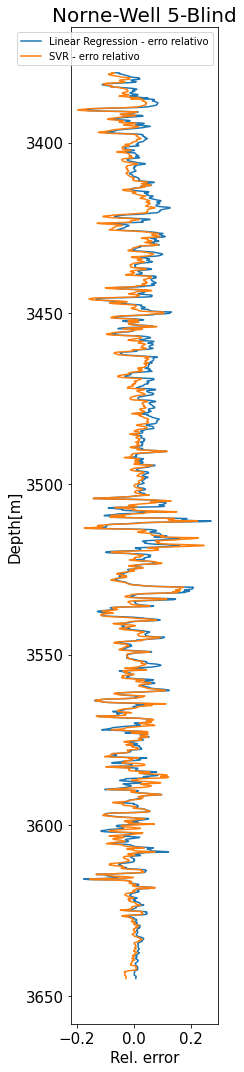

In [ ]:
##Erro relativo
f = plt.figure(figsize=(18,15))
ax1 = f.add_subplot(166)
#ax6.plot(er_gpr_default['VS'], np.array(depth5), label='Regressão Gaussiana sem hiperparametros')
ax1.plot(er_LR['VS'], np.array(depth5), label='Linear Regression - erro relativo')
ax1.plot(er_svr['VS'], np.array(depth5), label='SVR - erro relativo')
plt.legend(loc='best')
#plt.xlim(-0.5,3.5)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=20)
plt.xlabel('Rel. error', size=15)
plt.tick_params(axis='y', labelsize=15)

f.tight_layout()
plt.show()


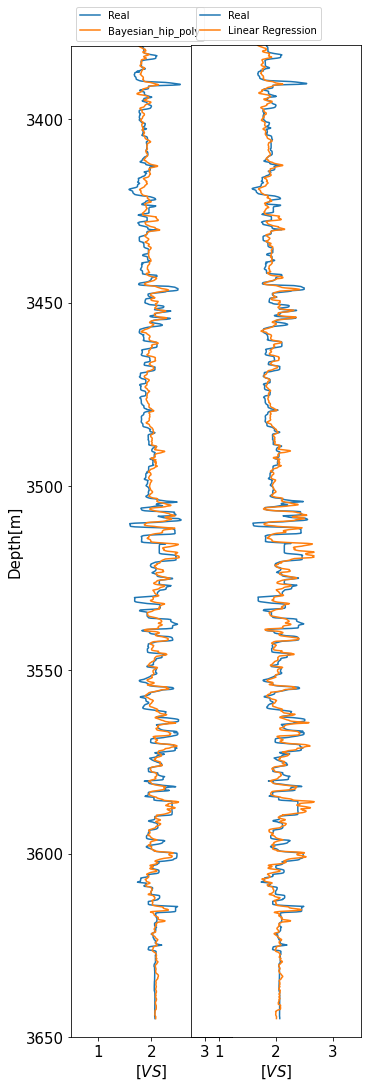

In [ ]:
##predito x real
# Plot real x predito modelo 1
import matplotlib.pyplot as plt
import numpy as np
f = plt.figure(figsize=(15,15), constrained_layout=True)
#plt.title('Modelo 1: real x predito - Regressões', fontsize=16)
ax1 = f.add_subplot(161) # 1= linha, 3 coluna e 1 coluna
ax1.plot(np.array(y5), np.array(depth5), label='Real')
ax1.plot(y_pred_blind_LR, np.array(depth5), label='Bayesian_hip_poly')
plt.legend(bbox_to_anchor=(0.001, 1, 1, 0.001))
#plt.legend(loc='lower right')
plt.xlim(0.5,3.5)
plt.ylim(3380,3650)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
#plt.yticks([])
plt.xlabel('[$VS$]', size=15)
plt.tick_params(axis='y', labelsize=15)

ax2 = f.add_subplot(162)
ax2.plot(np.array(y5), np.array(depth5), label='Real')
ax2.plot(y_pred_blind_svr, np.array(depth5), label='Linear Regression')
plt.legend(bbox_to_anchor=(0.001, 1, 1, 0.001))
#plt.legend(loc='lower right')
plt.xlim(0.5,3.5)
plt.ylim(3380,3650)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
plt.yticks([])
plt.xlabel('[$VS$]', size=15)
plt.tick_params(axis='y', labelsize=15)

# Modelo 2 - Campo cambo
Variáveis de $VS$ em ($RG$, $VP$, $\rho_B$ e $\phi_n$) para o modelo 1.
# Para cambo foi escolhido dois poços para treino e um para blind

In [ ]:

X8 = cambo_1.loc[:, ['GR', 'VP', 'RHOB', 'NPHI']]
X9 = cambo_3.loc[:, ['GR', 'VP', 'RHOB', 'NPHI']]
X10 = cambo_4.loc[:, ['GR', 'VP', 'RHOB', 'NPHI']]


y8 = cambo_1.loc[:, ['VS']]
y9 = cambo_3.loc[:, ['VS']]
y10 = cambo_4.loc[:, ['VS']]

depth9= cambo_3.index

##Separação dos dados de teste e treinamento campo norne

In [ ]:
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3) # test_size igual a 0.3 pega 30% do poço 1
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.3) # 1 linha pra cada poço

##Concatenação dos dados de referência campo norne

In [ ]:
X_ref_train_cambo = np.concatenate((X8_train, X10_train), axis = 0) # junta os 30% de cada poço para o treinamento de features
X_ref_test_cambo = np.concatenate((X8_test, X10_test), axis = 0) # junta os 70% de cada poço para teste de features

y_ref_train_cambo = np.concatenate((y8_train, y10_train), axis = 0) # junta os 30% de cada poço para o treinamento de target
y_ref_test_cambo = np.concatenate((y8_test, y10_test), axis = 0) # junta os 70 % de cada poço para o treinamento de target

##Escalonamento dos dados campo norne:Standard Scaler 

In [ ]:
scalerX = StandardScaler()
scalery = StandardScaler()
X_ref_train_sclnd_cambo = scalerX.fit_transform(X_ref_train_cambo)
X_ref_test_sclnd_cambo = scalerX.transform(X_ref_test_cambo)
X_blind_sclnd_cambo = scalerX.transform(X9) # Poço para validação

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



## Svr - Regressão para o campo cambo

In [ ]:
#Treinamento para o modelo SVR
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
#{'C': 100.0, 'epsilon': 1e-11, 'gamma': 1e-05}
#{'C': 100000.0, 'epsilon': 1e-11, 'gamma': 0.001}
regr = make_pipeline(StandardScaler(), SVR(C=100000.0, epsilon=1e-11, degree=3, gamma=0.001))
#regr = make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.0000000001, degree=3, gamma=0.1))

In [ ]:
svr_r = regr.fit(X_ref_train_sclnd_cambo, y_ref_train_cambo)
# Prediçao no poço teste 
y_pred_test_svr_cambo = svr_r.predict(X_ref_test_sclnd_cambo).reshape(-1,1)
# Predição no poço blind
y_pred_blind_svr_cambo = svr_r.predict(X_blind_sclnd_cambo).reshape(-1,1)

### Erro Relativo ###

er_svr_cambo = (y_pred_blind_svr_cambo - y9)/y9

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Verificando a acurácia do método de regressão linear
# Poço cego (blind)
#Mape
mape_svr_cambo = mean_absolute_percentage_error(y9, y_pred_blind_svr_cambo)

#O erro quadrático médio para o Poço cego da regressão Linear é
mse_svr_cambo = mean_squared_error(y9, y_pred_blind_svr_cambo, squared= True)

#Correlação entre o predito e o real regressão svr
r_SVR_correlation_blind_pred_cambo = pd.DataFrame(np.concatenate((np.array(y9), y_pred_blind_svr_cambo),axis=1)).corr().iloc[0,1]

#A raiz do erro quadrático médio para o Poço cego da regressão Linear é
rmse_svr_cambo = mean_squared_error(y9, y_pred_blind_svr_cambo, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.

#O erro absoluto médio para o Poço cego da regressão Linear
e_mean_svr_cambo = mean_absolute_error(y9, y_pred_blind_svr_cambo) 


#O R quadrado para o Poço teste da regressão Linear é
r2_svr_cambo = r2_score(y9, y_pred_blind_svr_cambo)

# Poço teste
#Mape
mape_svr_teste_cambo = mean_absolute_percentage_error(y_ref_test_cambo, y_pred_test_svr_cambo)

#O erro quadrático médio para o Poço teste da regressão Linear é
mse_svr_teste_cambo = mean_squared_error(y_ref_test_cambo, y_pred_test_svr_cambo, squared= True)

#Correlação entre o teste predito e o teste real
r_SVR_correlation_teste_pred_cambo = pd.DataFrame(np.concatenate((np.array(y_ref_test_cambo), y_pred_test_svr_cambo),axis=1)).corr().iloc[0,1]

#A raiz do erro quadrático médio para o Poço teste da regressão Linear é
rmse_svr_teste_cambo = mean_squared_error(y_ref_test_cambo, y_pred_test_svr_cambo, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.

#O erro absoluto médio para o Poço teste da regressão Linear
e_mean_svr_teste_cambo = mean_absolute_error(y_ref_test_cambo, y_pred_test_svr_cambo)
 
#O R quadrado para o Poço cego da regressão Linear é
r2_svr_teste_cambo = r2_score(y_ref_test_cambo, y_pred_test_svr_cambo)

In [ ]:
LR_cambo = LinearRegression().fit(X_ref_train_sclnd_cambo, y_ref_train_cambo)

y_pred_test_LR_cambo = LR_cambo.predict(X_ref_test_sclnd_cambo).reshape(-1,1)

### Teste no poço Blind (Norne 5)
y_pred_blind_LR_cambo = LR_cambo.predict(X_blind_sclnd_cambo).reshape(-1,1)

### Erro Relativo ###

er_LR_cambo = (y_pred_blind_LR_cambo - y9)/y9

In [ ]:
# Verificando a acurácia do método de regressão linear
# Poço cego (blind)
#Mape
mape_lr_cambo = mean_absolute_percentage_error(y9, y_pred_blind_LR_cambo)
#O erro quadrático médio para o Poço cego da regressão Linear é
mse_lr_cambo = mean_squared_error(y9, y_pred_blind_LR_cambo, squared= True)
#Correlação entre o predito e o real regressão linear
r_linear_correlation_blind_pred_cambo = pd.DataFrame(np.concatenate((np.array(y9), y_pred_blind_LR_cambo),axis=1)).corr().iloc[0,1]
#A raiz do erro quadrático médio para o Poço cego da regressão Linear é
rmse_lr_cambo = mean_squared_error(y9, y_pred_blind_LR_cambo, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#O erro absoluto médio para o Poço cego da regressão Linear
e_mean_lr_cambo = mean_absolute_error(y9, y_pred_blind_LR_cambo)
#O R quadrado para o Poço teste da regressão Linear é
r2_lr_cambo = r2_score(y9, y_pred_blind_LR_cambo)

# Poço teste
mape_lr_teste_cambo = mean_absolute_percentage_error(y_ref_test_cambo, y_pred_test_LR_cambo)
#O erro quadrático médio para o Poço teste da regressão Linear é
mse_lr_teste_cambo = mean_squared_error(y_ref_test_cambo, y_pred_test_LR_cambo, squared= True)
#Correlação entre o teste predito e o teste real
r_linear_correlation_teste_pred_cambo = pd.DataFrame(np.concatenate((np.array(y_ref_test_cambo), y_pred_test_LR_cambo),axis=1)).corr().iloc[0,1]
#A raiz do erro quadrático médio para o Poço teste da regressão Linear é
rmse_lr_teste_cambo = mean_squared_error(y_ref_test_cambo, y_pred_test_LR_cambo, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#O erro absoluto médio para o Poço teste da regressão Linear
e_mean_lr_teste_cambo = mean_absolute_error(y_ref_test_cambo, y_pred_test_LR_cambo) 
#O R quadrado para o Poço cego da regressão Linear é
r2_lr_teste_cambo = r2_score(y_ref_test_cambo, y_pred_test_LR_cambo)


In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Métricas','svr dado blind','svr dado test','RL dado blind','RL dado test'],
                                         align=['center','center'],
                                         font=dict(size=14)),
                cells=dict(values=[['MAPE','MSE','Correlação pearson', 'RMSE', 'MAE'],
                           ["{:.5f}".format(mape_svr_cambo),"{:.5f}".format(mse_svr_cambo), "{:.5f}".format(r_SVR_correlation_blind_pred_cambo), "{:.5f}".format(rmse_svr_cambo), "{:.5f}".format(e_mean_svr_cambo)],
                           ["{:.5f}".format(mape_svr_teste_cambo),"{:.5f}".format(mse_svr_teste_cambo), "{:.5f}".format(r_SVR_correlation_teste_pred_cambo), "{:.5f}".format(rmse_svr_teste_cambo), "{:.5f}".format(e_mean_svr_teste_cambo)],
                           ["{:.5f}".format(mape_lr_cambo),"{:.5f}".format(mse_lr_cambo), "{:.5f}".format(r_linear_correlation_blind_pred_cambo), "{:.5f}".format(rmse_lr_cambo), "{:.5f}".format(e_mean_lr_cambo)],
                           ["{:.5f}".format(mape_lr_teste_cambo),"{:.5f}".format(mse_lr_teste_cambo), "{:.5f}".format(r_linear_correlation_teste_pred_cambo), "{:.5f}".format(rmse_lr_teste_cambo), "{:.5f}".format(e_mean_lr_teste_cambo)],],)),])

fig.show()

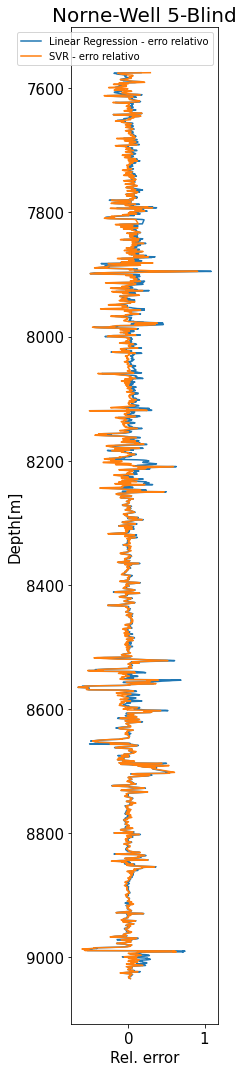

In [ ]:
##Erro relativo
f = plt.figure(figsize=(18,15))
ax1 = f.add_subplot(166)
#ax6.plot(er_gpr_default['VS'], np.array(depth5), label='Regressão Gaussiana sem hiperparametros')
ax1.plot(er_LR_cambo['VS'], np.array(depth9), label='Linear Regression - erro relativo')
ax1.plot(er_svr_cambo['VS'], np.array(depth9), label='SVR - erro relativo')
plt.legend(loc='best')
#plt.xlim(-0.5,3.5)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=20)
plt.xlabel('Rel. error', size=15)
plt.tick_params(axis='y', labelsize=15)

f.tight_layout()
plt.show()


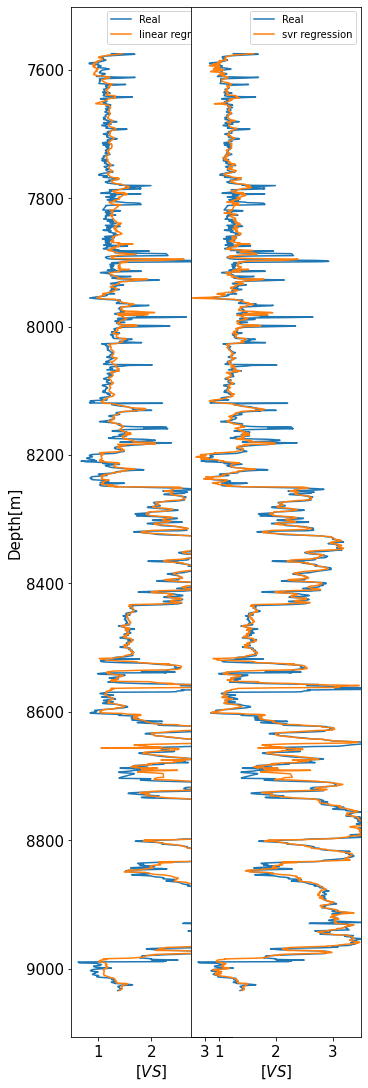

In [ ]:
##predito x real
# Plot real x predito modelo 1
import matplotlib.pyplot as plt
import numpy as np
f = plt.figure(figsize=(15,15), constrained_layout=True)
#plt.title('Modelo 1: real x predito - Regressões', fontsize=16)
ax1 = f.add_subplot(161) # 1= linha, 3 coluna e 1 coluna
ax1.plot(np.array(y9), np.array(depth9), label='Real')
ax1.plot(y_pred_blind_LR_cambo, np.array(depth9), label='linear regression')
plt.legend(bbox_to_anchor=(0.001, 1, 1, 0.001))
#plt.legend(loc='lower right')
plt.xlim(0.5,3.5)
#plt.ylim(3380,3650)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
#plt.yticks([])
plt.xlabel('[$VS$]', size=15)
plt.tick_params(axis='y', labelsize=15)

ax2 = f.add_subplot(162)
ax2.plot(np.array(y9), np.array(depth9), label='Real')
ax2.plot(y_pred_blind_svr_cambo, np.array(depth9), label='svr regression')
plt.legend(bbox_to_anchor=(0.001, 1, 1, 0.001))
#plt.legend(loc='lower right')
plt.xlim(0.5,3.5)
#plt.ylim(3380,3650)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
plt.yticks([])
plt.xlabel('[$VS$]', size=15)
plt.tick_params(axis='y', labelsize=15)